# Project 2 - Ames Housing Data and Kaggle Challenge

_By: Bryan Ho (DSI 14)_

---


## Problem Statement

House prices are always a thing of speculation, with many factors affecting it's value. Citizens struggle to find a house that fulfils their needs and wants which is within their budget. We aim to assess what factors greatly affect sale price of a house so that we can build a model which will in turn predict the potential prices (citizen's budget) for future unsold houses (citizen's needs / wants).

## Executive Summary

### Contents:
- [Data Import](#Data-Import)
- [Cleaning Null Values](#Cleaning-Null-Values)
- [Datatypes](#Datatypes)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Train/Test Split and Model Validation](#Train/Test-Split-and-Model-Validation)
- [Submission](#Submission)
- [Conclusion](#Conclusion)

## Data Import
---

We'll be importing following libraries for the project:

1. `pandas`
2. `numpy`
3. `matplotlib.pyplot`
4. `seaborn`
5. `metrics` from `sklearn`
4. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
5. `LinearRegression`, `LassoCV` and `RidgeCV` from `sklearn`'s `linear_model` module
6. `StandardScaler` from `sklearn`'s `preprocessing` module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler


In [2]:
train = pd.read_csv('../datasets/train.csv')

In [3]:
test = pd.read_csv('../datasets/test.csv')

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
train.shape

(2051, 81)

In [7]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [8]:
train.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Electrical         0
Central Air        0
Heating QC         0
Sale Type          0
Id                 0
Length: 81, dtype: int64

---

## Cleaning Null Values

As the dataset is large with many columns, we will be doing our data cleaning based on numerical and non-numerical data

### Numerical

In [9]:
train_num = train[[col for col in train._get_numeric_data().columns]]

In [10]:
train_num.isnull().sum().sort_values(ascending=False)

Lot Frontage       330
Garage Yr Blt      114
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Area          1
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Low Qual Fin SF      0
MS SubClass          0
PID                  0
1st Flr SF           0
2nd Flr SF           0
SalePrice            0
Gr Liv Area          0
Open Porch SF        0
Mo Sold              0
Misc Val             0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Wood Deck SF         0
Yr Sold              0
Fireplaces           0
TotRms AbvGrd        0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
Id                   0
dtype: int64

#### Based on the numerical null values above, we have decided the following approaches to deal with the null values

#### Mean
As the missing data for the following 3 are linked to a numerical value such as area, distance and age, we will use the mean of each respective column to append the missing data
1. **Lot Frontage**: Linear feet of street connected to property
2. **Garage Yr Blt**: Year Garage was built
3. **Mas Vnr Area**: Masonry veneer area in square feet

#### Existence
The data below has a relation to other columns, Basement and Garage size etc. can be related to the non-numerical categorical data of the existence of a basement/garage in the first place. We will compare the null data to the respective columns and fill the data with 0 if there is no basement/garage.

####  Related Column: Bsmt Cond: _Condition of Basement_
4. **Bsmt Half Bath**: Basement half bathrooms
5. **Bsmt Full Bath**: Basement full bathrooms
6. **BsmtFin SF 1**: Type 1 finished square feet
7. **BsmtFin SF 2**: Type 2 finished square feet
8. **Bsmt Unf SF**: Unfinished square feet of basement area
9. **Total Bsmt SF**: Total square feet of basement area

#### Related Column: Garage Type: _Garage location_
10. **Garage Cars**: Size of garage in car capacity
11. **Garage Area**: Size of garage in square feet

#### Basement and Garage (Existence)

In [11]:
# Compiling basement columns with null values
basement_columns = ['Bsmt Cond', 'Bsmt Half Bath', 'Bsmt Full Bath','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']

In [12]:
# locate all basement null values to compare against Bsmt Cond to see if Basement Exists
train_num.loc[(train_num['Bsmt Half Bath'].isnull() | train_num['Bsmt Full Bath'].isnull() | train_num['BsmtFin SF 1'].isnull() | train_num['BsmtFin SF 2'].isnull() | train_num['Bsmt Unf SF'].isnull() | train_num['Total Bsmt SF'].isnull()), basement_columns]

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Bsmt Cond,Bsmt Half Bath,Bsmt Full Bath,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
616,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Since the null values have no basements, we will follow according to other data and replace the null value as a float with value 0.0
train_num['Bsmt Half Bath'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Bsmt Half Bath, dtype: float64

In [14]:
# Steps similar to Basement
garage_columns = ['Garage Type', 'Garage Cars', 'Garage Area']

In [15]:
train_num.loc[(train_num['Garage Cars'].isnull() | train_num['Garage Area'].isnull()), garage_columns]

,Garage Type,Garage Cars,Garage Area
1712,NaN,NaN,NaN


In [16]:
train_num['Garage Cars'].head()

0    2.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: Garage Cars, dtype: float64

#### Adjustments passed

In [17]:
# Mean
train['Lot Frontage'].fillna(train['Lot Frontage'].mean(), inplace = True)
train['Garage Yr Blt'].fillna(train['Garage Yr Blt'].mean(), inplace = True)
train['Mas Vnr Area'].fillna(train['Mas Vnr Area'].mean(), inplace = True)

# Existence of Garage
train['Garage Cars'].fillna(0.0, inplace = True)
train['Garage Area'].fillna(0.0, inplace = True)

# Existence of Basement
train['Bsmt Half Bath'].fillna(0.0, inplace = True)
train['Bsmt Full Bath'].fillna(0.0, inplace = True)
train['BsmtFin SF 1'].fillna(0.0, inplace = True)
train['BsmtFin SF 2'].fillna(0.0, inplace = True)
train['Bsmt Unf SF'].fillna(0.0, inplace = True)
train['Total Bsmt SF'].fillna(0.0, inplace = True)

### Non-numerical

In [18]:
# Extract all column data that was not analysed in train_num
train_non_num = train[[col for col in train.columns if col not in train_num]]

In [19]:
train_non_num.isnull().sum().sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Condition 1          0
Neighborhood         0
Condition 2          0
Bldg Type            0
Sale Type            0
Lot Config           0
Land Slope           0
Roof Style           0
Utilities            0
Land Contour         0
Lot Shape            0
Street               0
House Style          0
Foundation           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Exter Cond           0
Heating              0
Heating QC           0
Central Air          0
Electrical           0
Kitchen Qual         0
Functional           0
Paved Drive          0
MS Zoning            0
dtype: int64

### Based on the non-numerical null values above, we have decided to categorise our approach to deal with the null values

#### Drop entire column
As there is a large amount of null value, we have decided to drop the following columns
1. **Pool QC**
2. **Misc Feature**
3. **Alley**
4. **Fence**
5. **Fireplace Qu**

#### Non-existent
Based on the Ordinal data, we will assume there is no Garage/Basement for the following rows and convert the null value to NA/None based on their respective category.
6. **Garage Cond**
7. **Garage Qual**
8. **Garage Finish**
9. **Garage Type**
10. **Bsmt Exposure**
11. **BsmtFin Type 2**
12. **BsmtFin Type 1**
13. **Bsmt Cond**
14. **Bsmt Qual**
15. **Mas Vnr Type**


#### Adjustments passed

In [20]:
# Large null value
train.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], inplace=True)
train_non_num.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], inplace=True)
# Existence of Garage
train['Garage Cond'].fillna('NA', inplace = True)
train['Garage Qual'].fillna('NA', inplace = True)
train['Garage Finish'].fillna('NA', inplace = True)
train['Garage Type'].fillna('NA', inplace = True)

# Existence of Basement
train['Bsmt Exposure'].fillna('NA', inplace = True)
train['BsmtFin Type 2'].fillna('NA', inplace = True)
train['BsmtFin Type 1'].fillna('NA', inplace = True)
train['Bsmt Cond'].fillna('NA', inplace = True)
train['Bsmt Qual'].fillna('NA', inplace = True)

# Existence of Masonry
train['Mas Vnr Type'].fillna('None', inplace = True)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
# Check for any remaining null values
train.isnull().sum().sort_values(ascending=False)

SalePrice         0
Exter Qual        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
                 ..
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Id                0
Length: 76, dtype: int64

---

## Datatypes

We analyse the column types in the dataset to identify if they are categorised appropriately.

### Numerical

In [22]:
train_num.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Y

### Observations:
We can see that majority of the datatypes are related to continuous data such as area and distance, and discrete data such as number of baths. We have narrowed down a few columns which are not in-line with being represented as a numerical feature:

- **MS Subclass (Nominal)**: Type of dwelling involved in the sale

We will convert this column into a string as it is a categorical variable.

Also, we take note of these data as the value (higher or lower) may not directly attribute to SalePrice:

- **Year Built (Discrete)**: Year built
- **Year Remod/Add (Discrete)**: Year remodelled
- **Garage Yr Blt (Discrete)**: Garage year built

#### Adjustments passed

In [23]:
train['MS SubClass'] = train['MS SubClass'].astype(str)
test['MS SubClass'] = test['MS SubClass'].astype(str)

### Non-numerical

In [24]:
train_non_num.dtypes

MS Zoning         object
Street            object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Kitchen Qual      object
Functional        object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Sale Type         object
dtype: object

In [25]:
# After data cleaning is complete, we update our num and non_num dataframe if we require further analysis
train_num = train[[col for col in train._get_numeric_data().columns]]
train_non_num = train[[col for col in train.columns if col not in train_num]]

### Test Data Cleaning

In [26]:
test.isnull().sum().sort_values(ascending=False)

Pool QC         875
Misc Feature    838
Alley           821
Fence           707
Fireplace Qu    422
               ... 
Heating QC        0
Heating           0
Yr Sold           0
Bsmt Unf SF       0
Id                0
Length: 80, dtype: int64

In [27]:
test.shape

(879, 80)

In [28]:
# Similar to train data, we will be performing the same adjustments to numeric and non-numeric data separately due to the vast number of columns
test_num = test[[col for col in test._get_numeric_data().columns]]

In [29]:
test_non_num = test[[col for col in test.columns if col not in test_num.columns]]

In [30]:
test_num.isnull().sum().sort_values(ascending=False)

Lot Frontage       160
Garage Yr Blt       45
Mas Vnr Area         1
BsmtFin SF 1         0
Low Qual Fin SF      0
2nd Flr SF           0
1st Flr SF           0
Total Bsmt SF        0
Bsmt Unf SF          0
BsmtFin SF 2         0
Yr Sold              0
Bsmt Full Bath       0
Year Remod/Add       0
Year Built           0
Overall Cond         0
Overall Qual         0
Lot Area             0
PID                  0
Gr Liv Area          0
Bsmt Half Bath       0
Mo Sold              0
Wood Deck SF         0
Misc Val             0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Open Porch SF        0
Garage Area          0
Full Bath            0
Garage Cars          0
Fireplaces           0
TotRms AbvGrd        0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
Id                   0
dtype: int64

In [31]:
test_non_num.isnull().sum().sort_values(ascending=False)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Garage Cond        45
Garage Qual        45
Garage Finish      45
Garage Type        44
BsmtFin Type 2     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
Electrical          1
Mas Vnr Type        1
Land Slope          0
Neighborhood        0
Condition 2         0
Lot Config          0
Condition 1         0
Sale Type           0
Land Contour        0
Utilities           0
House Style         0
Lot Shape           0
Street              0
MS Zoning           0
Bldg Type           0
Foundation          0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Exter Qual          0
Exter Cond          0
Heating             0
Heating QC          0
Central Air         0
Kitchen Qual        0
Functional          0
Paved Drive         0
MS SubClass         0
dtype: int64

#### Adjustments passed

In [32]:
# Mean
test['Lot Frontage'].fillna(test['Lot Frontage'].mean(), inplace = True)
test['Garage Yr Blt'].fillna(test['Garage Yr Blt'].mean(), inplace = True)
test['Mas Vnr Area'].fillna(test['Mas Vnr Area'].mean(), inplace = True)

# Existence of Garage
test['Garage Cars'].fillna(0.0, inplace = True)
test['Garage Area'].fillna(0.0, inplace = True)

# Existence of Basement
test['Bsmt Half Bath'].fillna(0.0, inplace = True)
test['Bsmt Full Bath'].fillna(0.0, inplace = True)
test['BsmtFin SF 1'].fillna(0.0, inplace = True)
test['BsmtFin SF 2'].fillna(0.0, inplace = True)
test['Bsmt Unf SF'].fillna(0.0, inplace = True)
test['Total Bsmt SF'].fillna(0.0, inplace = True)

In [33]:
# Large null value
test.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], inplace=True)
test_non_num.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], inplace=True)
# Existence of Garage
test['Garage Cond'].fillna('NA', inplace = True)
test['Garage Qual'].fillna('NA', inplace = True)
test['Garage Finish'].fillna('NA', inplace = True)
test['Garage Type'].fillna('NA', inplace = True)

# Existence of Basement
test['Bsmt Exposure'].fillna('NA', inplace = True)
test['BsmtFin Type 2'].fillna('NA', inplace = True)
test['BsmtFin Type 1'].fillna('NA', inplace = True)
test['Bsmt Cond'].fillna('NA', inplace = True)
test['Bsmt Qual'].fillna('NA', inplace = True)

# Existence of Masonry
test['Mas Vnr Type'].fillna('None', inplace = True)

In [34]:
test.isnull().sum().sort_values(ascending=False)

Electrical        1
Sale Type         0
Exter Qual        0
Year Remod/Add    0
Roof Style        0
                 ..
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
Id                0
Length: 75, dtype: int64

In [35]:
# Additional adjustment ('Electrical')
# Analyse the unique values
# We noted that SBrkr is the majority value within the Electrical column
# As there is only 1 null value, we will substitute the null value with the majority class
test['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [36]:
train['Electrical'].fillna('SBrkr', inplace = True)

In [37]:
# After dropping the row with 'Electrical' null value, our test data is free of null values
test.isnull().sum().sort_values(ascending=False)

Electrical        1
Sale Type         0
Exter Qual        0
Year Remod/Add    0
Roof Style        0
                 ..
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
Id                0
Length: 75, dtype: int64

In [38]:
# We update our dataframes with the test dataframe after adjustments
test_num = test[[col for col in test._get_numeric_data().columns]]
test_non_num = test[[col for col in test.columns if col not in test_num]]

### Additional cleaning
For our test dataset, we wil be performing 2 more tests to ensure that the data is in-line with the training dataset.

1. Ensure columns are the same
2. Ensure categorical variables unique values match train data

#### Same columns
Here, we define a function to cross check columns in our updated train and test dataset.

In [39]:
def column_cross_check(train, test):
    """Cross-checks training and test datasets by iterating through the columns to see if it is in each other's column"""
    train_list = train.columns
    test_list = test.columns
    missing_from_train = []
    missing_from_test = []
    for col in train_list:
        if col not in test_list:
            missing_from_test.append(col)
        else:
            continue
    for col in test_list:
        if col not in train_list:
            missing_from_train.append(col)
        else:
            continue
    print ('Train dataset is missing {}'.format(missing_from_train))
    print ('Test dataset is missing {}'.format(missing_from_test))

In [40]:
# From our function, we can see that the only missing column is that the test dataset does not have salesprice. This is in-line with our understanding.
column_cross_check(train, test)

Train dataset is missing []
Test dataset is missing ['SalePrice']


---

## Exploratory Data Analysis

### Analysis on numerical data

#### Sale Price Correlation

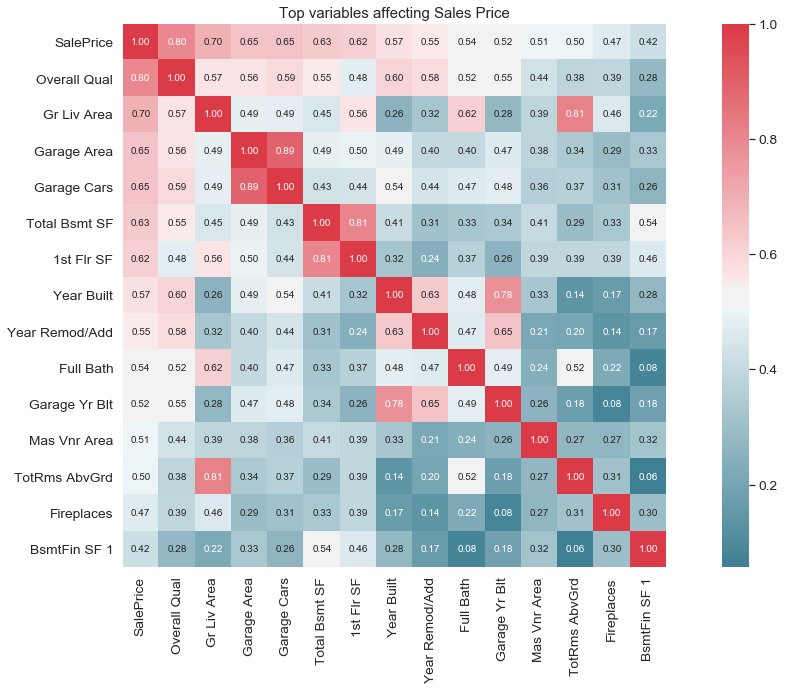

In [41]:
corrmat = train.corr()
plt.figure(figsize=(20,10))
k = 15
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cm, cmap=cmap, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Top variables affecting Sales Price");
plt.show()

We will be looking at the first column of the heatmap which represents the top variables affecting sales price.

**Takeaways**
- **Space in general** contributes to higher price as the basement and 1st floor square feet have a **high positive correlation above 60%**
- The size of the **garage** greatly affects sales price with the area and car space greatly contributing to the influence. We will **create a total square feet column** which includes the area of other living areas in the house as well to represent the space feature
- The higher the **Overall Quality** of the house greatly increases sales price, representing a **correlation of 80%**
- Higher number of **year built** has a **correlation above 50%**. This could be interpretted as newer houses built (e.g. 2005 vs 2010) carry a larger sale price perhaps due to a smaller age of the house. Based on this, we will create an age column as we can infer that younger houses will fetch a higher sale price
- As year **remodelled has a positive correlation of 55%** with sale price, we will create a column of categorical variables that represents whether a house has been remodelled

In [42]:
# Creating Total Square Feet column based on the sum of Basement, Garage, 1st and 2nd Floor square feet
train['Total SF'] = train['Total Bsmt SF'] + train['Gr Liv Area'] + train['1st Flr SF'] + train['2nd Flr SF']

# Age Column = Year Sold - Year Built
train['Age'] = train['Yr Sold'] - train['Year Built']

# Factoring in if the house has been remodelled or not
train['Remodelled'] = np.where(train['Year Remod/Add'] == train['Year Built'], 1, 0)

In [43]:
# Create the same columns for our test data
test['Total SF'] = test['Total Bsmt SF'] + test['Gr Liv Area'] + test['1st Flr SF'] + test['2nd Flr SF']
test['Age'] = test['Yr Sold'] - test['Year Built']
test['Remodelled'] = np.where(test['Year Remod/Add'] == test['Year Built'], 1, 0)

#### Validity of new 'Age' column

In [44]:
# Analyse the mean sales prices for different ages of houses
train.pivot_table(index='Age', values='SalePrice')

,SalePrice
Age,
-1,183850.000000
0,282679.362500
1,265641.714286
2,233677.887097
3,252187.500000
...,...
127,117500.000000
128,240000.000000
129,131000.000000


In [45]:
# Identifying house with Age = -1
train.loc[train['Age'] == -1, ['Id', 'Age', 'Yr Sold', 'Year Remod/Add', 'Year Built', 'SalePrice', 'Total SF']]

,Id,Age,Yr Sold,Year Remod/Add,Year Built,SalePrice,Total SF
1885,2181,-1,2007,2009,2008,183850,15285.0


#### Takeaways
- We detected an abnormally in the Age of a house sold, the house has been sold 1 year before it is built
- We originally made an assumption that this was a typo error and that the house's age is 0
- However, comparing the sales price of 180K to the age of houses Aged 0 - 3 (Average 250K), it is not in-line with our assumption that new houses are more expensive
- Thus we cannot assume that the actual age of the house is 0 and will drop the row

#### Overall Quality level

In [46]:
quality = train.pivot_table(index='Overall Qual', values='SalePrice')

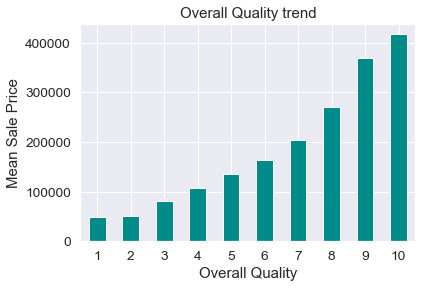

In [47]:
quality.plot(kind='bar', legend=False, color='darkcyan')
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')
plt.title('Overall Quality trend')
plt.xticks(rotation=0);

#### Takeaways
- Being the highest correlation to sales price of 80%, we note that every step of 1 of overall quality greatly increases the sales price by 20-30K

#### Sale Price relation to Square Feet of house

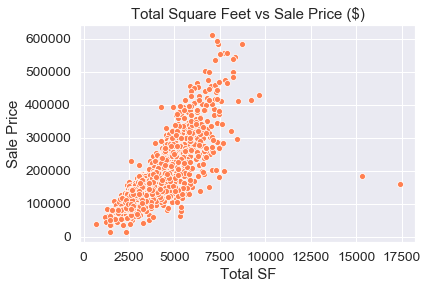

In [48]:
ax = sns.scatterplot(data=train, x='Total SF', y='SalePrice', color = 'coral')
ax.set_xlabel('Total SF')
ax.set_ylabel('Sale Price')
ax.set_title('Total Square Feet vs Sale Price ($)');

#### Takeaways
- The scatterplot depicts a homoscedastic pattern with the higher the square feet of the overall house, the increase in sales price, however we have noted two outliers on the right of the graph with extremely large square feet (~15K and ~17K respectively)
- We will analyse these two outliers to determine if the data input was reasonable:

In [49]:
# Analysing outliers with low selling price and large square feet
train.loc[train['Total SF'] >= 15000, ['Id', 'Age', 'Yr Sold', 'Year Remod/Add', 'Year Built', 'SalePrice', 'Total SF']]

,Id,Age,Yr Sold,Year Remod/Add,Year Built,SalePrice,Total SF
960,1499,0,2008,2008,2008,160000,17394.0
1885,2181,-1,2007,2009,2008,183850,15285.0


From our analysis, the low selling price of the two houses are an abnormally which we cannot determine whether it was a data input error or a large discount.

However as the age of the houses are low (including the typo error of Age -1 for one of the houses), this is against our assumptions that younger houses with larger square feet should have higher Sale Price.

We have decided to drop these two outliers for our training dataset.

In [50]:
# Drop two outlier rows
train = train[train['Id'] != 1499]
train = train[train['Id'] != 2181]

### Analysis on non-numerical data

#### Frequency of Top unique values

In [51]:
# Describe the number of unique variables, 
# and the frequency of top variables for our categorical data
train_non_num.describe()

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
count,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,...,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051
unique,16,7,2,4,4,3,5,3,28,9,...,2,5,4,8,7,4,6,6,3,9
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD
freq,770,1598,2044,1295,1843,2049,1503,1953,310,1767,...,1910,1868,1047,1915,1213,849,1832,1868,1861,1781


#### Takeaways
- We will build our model based on lowest frequency/count ratio of our top unique values
- e.g. 'Street' has a top variable called 'Pave' that consist of 99%+ of the total count, we can assume that any future test data that we are feeding into our model will have similar ratio which would result in overall sales prices not being affected by 'Street' due to majority of the variables falling under 'Pave'
- We will factor categorical variables with top frequency of less than 65% to fit into our training model

In [52]:
# Create a computation series based on top frequency / count
frequency_series = train_non_num.apply(pd.Series.value_counts, normalize=True).max().sort_values()

# For each column, what is the frequency / count ratio (Sorted from lowest to highest)
frequency_series[:5]

Neighborhood      0.151146
BsmtFin Type 1    0.299854
Exterior 2nd      0.351536
Exterior 1st      0.352999
MS SubClass       0.375427
dtype: float64

In [53]:
# Data frame of frequency ratio
frequency_values = pd.DataFrame(frequency_series).rename(columns={0: 'frequency'})
frequency_values.head()

,frequency
Neighborhood,0.151146
BsmtFin Type 1,0.299854
Exterior 2nd,0.351536
Exterior 1st,0.352999
MS SubClass,0.375427


In [54]:
# Creating a dataframe of unique values for each column to prepare for a merge with frequency ratio
unique_values = pd.DataFrame.transpose(train_non_num.describe().loc[['unique']])
unique_values.head()

,unique
MS SubClass,16
MS Zoning,7
Street,2
Lot Shape,4
Land Contour,4


In [55]:
# Combine the two dataframes based on the column name
combined = pd.concat([frequency_values,unique_values], axis=1, sort=0)
combined.head()

,frequency,unique
Neighborhood,0.151146,28
BsmtFin Type 1,0.299854,7
Exterior 2nd,0.351536,15
Exterior 1st,0.352999,15
MS SubClass,0.375427,16


In [56]:
# Filter frequency values below 65%
focus = combined.loc[combined['frequency'] <= 0.65]
focus.head()

,frequency,unique
Neighborhood,0.151146,28
BsmtFin Type 1,0.299854,7
Exterior 2nd,0.351536,15
Exterior 1st,0.352999,15
MS SubClass,0.375427,16


#### Low Unique Columns

In [57]:
# As we do not want to flood our subplot, 
# we filter out columns with unique value above 10
low_unique_columns = focus[focus['unique'] < 10].index.tolist()
low_unique_columns

['BsmtFin Type 1',
 'Garage Finish',
 'Bsmt Qual',
 'Foundation',
 'Kitchen Qual',
 'House Style',
 'Heating QC',
 'Garage Type',
 'Mas Vnr Type',
 'Exter Qual',
 'Lot Shape']

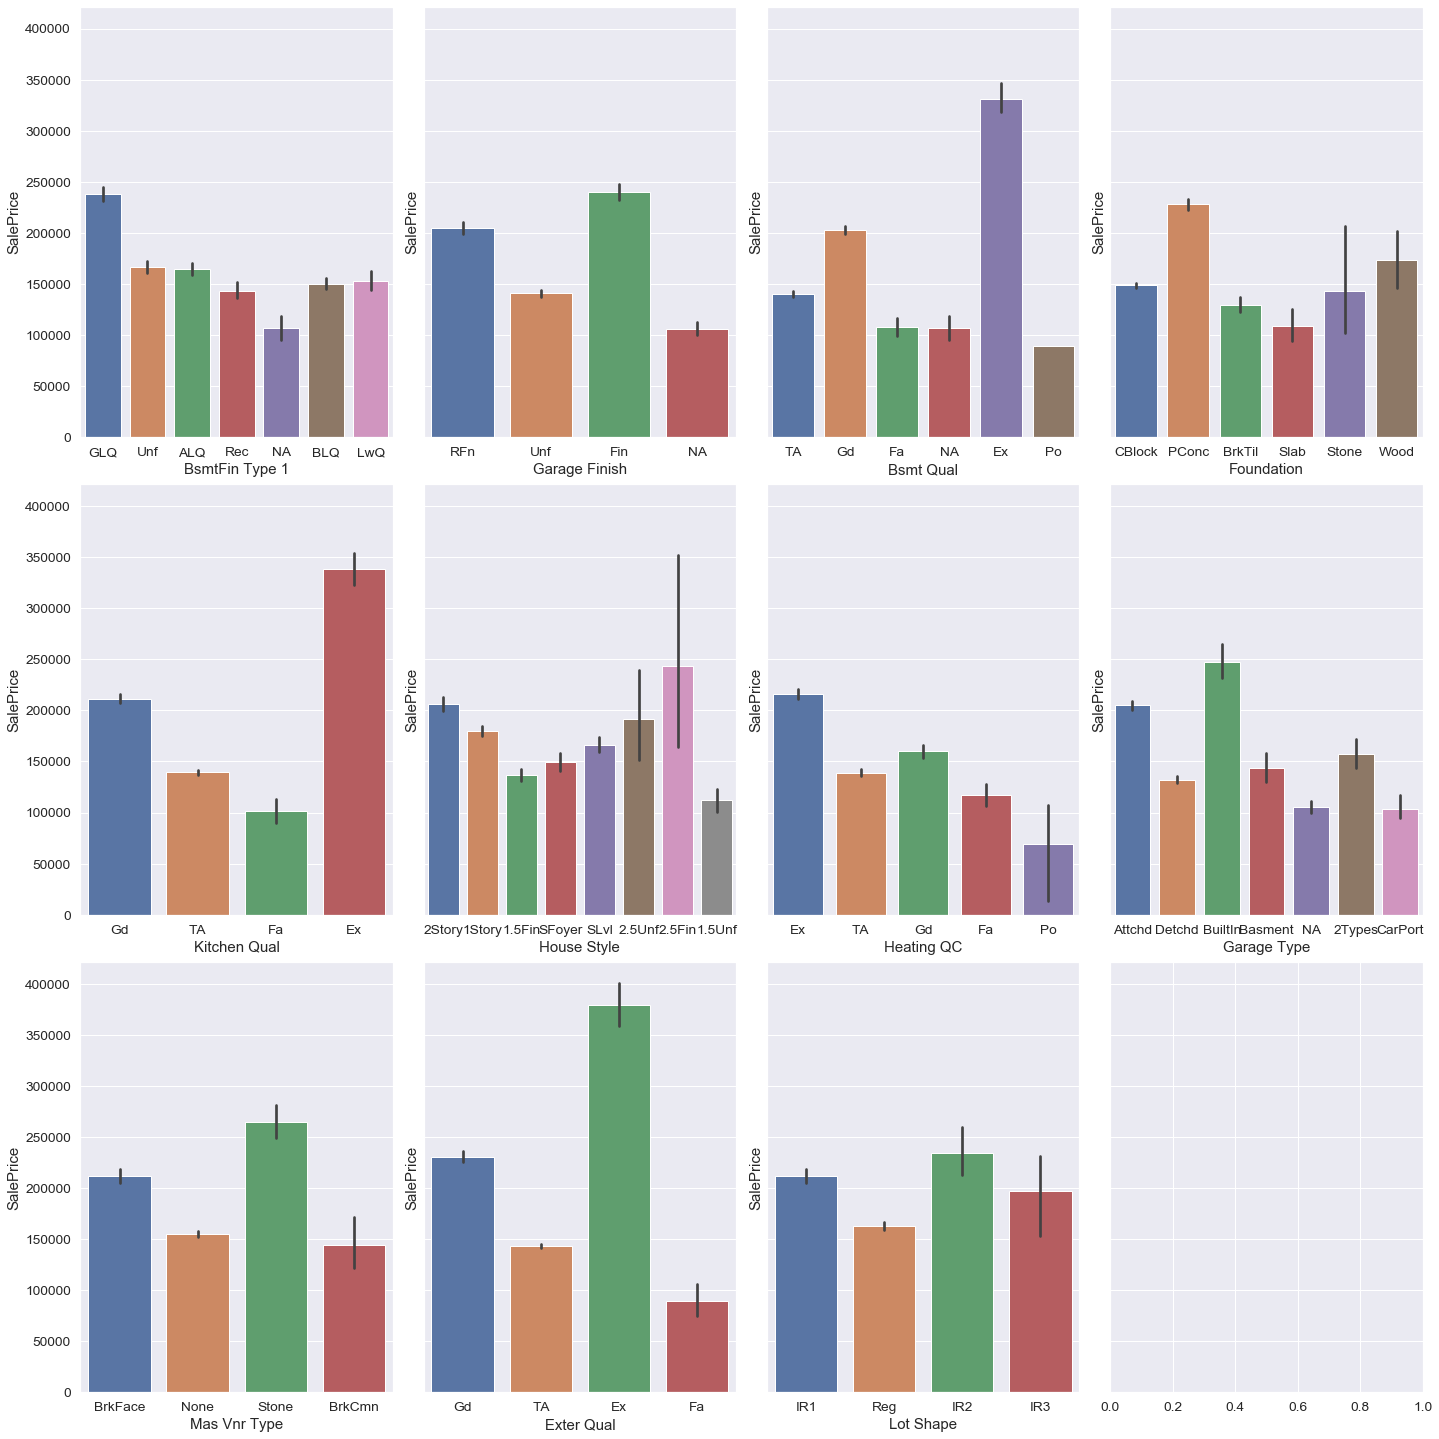

In [58]:
# Plot a subplot to analyse trend between unique variables and Sale Price
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 20), sharey=True)
ax = ax.ravel()
# Iterate through our low_unique_columns to create a subplot for each column
for i in range(len(low_unique_columns)):
    sns.barplot(x=low_unique_columns[i], y='SalePrice', data=train, ax=ax[i])
plt.tight_layout(pad=0.5)

#### Takeaways
- At a glance, we noted that each unique value represents a different mean sales price
- This is especially prevalent for Quality as Ex (Excellent) quality of the houses greatly increase the price of the house by an average of 200K against second best (Good) quality
- Each House Style returns a different mean sales price
- We have decided to one-hot encode these selected columns as each unique value impacts Sale Price in a different way with the difference between each quality 'level' almost amounting to 70-100K

#### High Unique Columns

As these columns contain many unique values, we avoid identifying each value one by one and instead, analyse if there varying values impact sale price in a different way.

In [59]:
# These are the 4 high unique columns that have
# a top frequency ratio of below 65%
high_unique_columns = focus[focus['unique'] >= 10].index.tolist()
high_unique_columns

['Neighborhood', 'Exterior 2nd', 'Exterior 1st', 'MS SubClass']

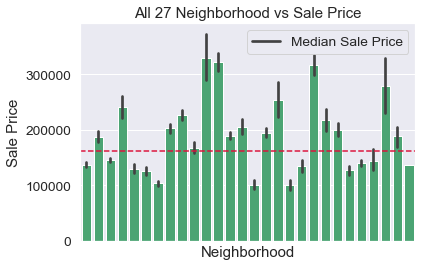

In [60]:
# Analyse the 27 unique values of 'Neighborhood' and see if there is a
# trend and a large variance against median sale price
ax = sns.barplot(x='Neighborhood', y='SalePrice', data=train, color='mediumseagreen')
ax.axhline(train['SalePrice'].median(), color='crimson', linestyle='--')
ax.set_xticks([])
ax.set_title('All 27 Neighborhood vs Sale Price')
ax.set_ylabel('Sale Price')
ax.legend({'Median Sale Price':train['SalePrice'].median()});

#### Takeaways
- For Neighborhood, we can see that each unique value varies greatly from each other, and also the highest and lowest values are far from the Sale Price median by about 100K
- We will use this assumption for the other 3 high unique columns as the Exterior column relates to quality which is a big factor in Sale Price determination and MS SubClass relates to the type of house

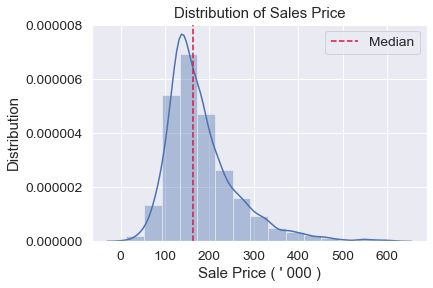

In [61]:
ax = sns.distplot(train['SalePrice'], bins=15)
ax.set_xlabel("Sale Price ( ' 000 )")
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_ylabel('Distribution')
ax.set_title('Distribution of Sales Price')
ax.axvline(train['SalePrice'].median(), color='crimson', linestyle='--')
plt.legend({'Median':train['SalePrice'].median()});

- Histogram distribution is a normal distribution with a positive skew
- We can see that there are 3 unique values in our Neighborhood graph above 300K mean sales
- Based on the histogram, sales price above 300K has a very low distribution, contributing to the assumption that Neighborhood is an important feature that affects sales price

#### Adjustments passed
We will select these categorical variables as our features and perform one-hot encoding to distinguish our Sale Price predictions

In [62]:
unique_columns = focus.index.tolist()
unique_columns

['Neighborhood',
 'BsmtFin Type 1',
 'Exterior 2nd',
 'Exterior 1st',
 'MS SubClass',
 'Garage Finish',
 'Bsmt Qual',
 'Foundation',
 'Kitchen Qual',
 'House Style',
 'Heating QC',
 'Garage Type',
 'Mas Vnr Type',
 'Exter Qual',
 'Lot Shape']

In [63]:
# Convert categorical variables into dummies
train_dummies = pd.get_dummies(train[unique_columns], drop_first=True)

In [64]:
# Add these columns into our training dataset
train = pd.concat([train,train_dummies], axis=1)

In [65]:
# Apply the same for our test dataset
test_dummies = pd.get_dummies(test[unique_columns], drop_first=True)

In [66]:
test = pd.concat([test,test_dummies], axis=1)

### Features and final cleaning
#### Dropping columns for feature selection

First we will drop the following columns to finalise our feature selection:

**Numerical**
1. Drop all **square feet** columns that was used in calculating Total Square Feet
2. Drop all columns used in **computing age** and remodelling status

**Categorical**
3. Drop all columns that were originally used for our **one-hot encoding**

**Redundant columns**
4. Drop all columns that do not have an explicit relation to sale price. e.g. **PID** and **ID**
5. SalePrice, as it will be used to compare against our predictions

In [67]:
features = train.drop(columns=['Total Bsmt SF', 
                               'Gr Liv Area', 
                               '1st Flr SF', 
                               '2nd Flr SF', 
                               'Yr Sold', 
                               'Year Built', 
                               'Year Remod/Add',
                               'Year Built', 
                               'MS SubClass', 
                               'Id', 
                               'SalePrice', 
                               'PID'])

In [68]:
# Select only numerical data and one-hot encoding data
# to remove unselected categorical variables
features = train[[col for col in features._get_numeric_data().columns]]

In [69]:
# Get the columns for our X Train/Test
features = [col for col in features.columns]

#### Analyse missing columns in test dataset
As our test data requires us to have the same feature columns as our training dataset. We analyse which columns are missing (especially for one-hot encoded features) and create a new column

In [70]:
# Apply our cross check columns function
# to analyse if our test dataset has any missing columns
column_cross_check(train_dummies, test_dummies)

Train dataset is missing ['Exterior 2nd_Other', 'Exterior 2nd_PreCast', 'Exterior 1st_PreCast', 'Kitchen Qual_Po', 'Mas Vnr Type_CBlock']
Test dataset is missing ['Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'Exterior 2nd_Stone', 'Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_Stone', 'MS SubClass_150', 'Heating QC_Po']


We will add new columns into our test dataset which is indicated from the 'Test dataset is missing' list above.

In [71]:
test_missing_cols = ['Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'Exterior 2nd_Stone', 'Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_Stone', 'MS SubClass_150', 'Heating QC_Po']

# Iterate through list to give new column value = 0
for col in test_missing_cols:
    test[col] = 0

---

## Train/Test Split and Model Validation

### Train/Test Split

Load our `X` and `y` variables with our selected features and SalePrice.

In [72]:
X = train[features]
y = train['SalePrice']

In [73]:
X.shape

(2049, 149)

In [74]:
y.shape

(2049,)

Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [76]:
X_train.shape

(1536, 149)

Since we're using `Lasso` and `Ridge`, we'll be scaling our features using `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`.

In [77]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Instantiating our models
Create instances for `LinearRegression`, `LassoCV` and `RidgeCV` and evaluate which model performs the best.

In [79]:
lr = LinearRegression()

In [80]:
lasso = LassoCV(n_alphas=200, cv=5)

In [81]:
ridge = RidgeCV(alphas = np.linspace(0.1, 10, 200))

In [82]:
lr_scores = cross_val_score(lr, X_train_sc, y_train, cv=5).mean()
lr_scores

-4.823337182314526e+22

In [83]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()
lasso_scores

0.9048421004413946

In [84]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()
ridge_scores

0.9036128693725898

#### Takeaways
#### Score a.k.a, $R^2$

#### $R^2 = \frac{\text{Explained variance}}{\text{Total variance}} = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$

- **Lasso** performs the best in our cross validation `score` at **90.48**
- We will be using lasso regression to for our `X_test_sc` data as well as for our final test dataframe

In [85]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [86]:
# Our score for our training data
lasso.score(X_train_sc, y_train)

0.9248592841662483

In [87]:
# Our score for our test data is close to our training data
lasso.score(X_test_sc, y_test)

0.9250322365939422

As our `score` appears to be performing well for both our `X_train_sc` and `X_test_sc`, we would like to visualise our predictions against the actual SalePrice.

In [88]:
# Store our prediction results in an array
predictions = lasso.predict(X_test_sc)
predictions[:5]

array([115431.5457892 , 356128.20818672, 100584.72740822, 134441.38862381,
       120778.84784805])

In [89]:
# Calculate our residuals/difference between the actual and our predictions
residuals = y_test - predictions

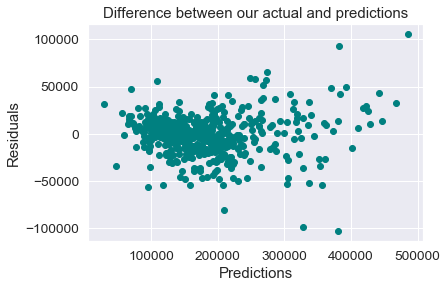

In [90]:
# Visualise the residuals
plt.scatter(predictions,residuals, c='teal')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Difference between our actual and predictions');

#### Takeaways
- From the graph we can see that majority of our predictions within the **highest distributed area** for sales (150K - 200K) have generally **low residuals** which indicate that our predictions are close to the actual
- There are a few points that residuals are above or below 100K for prices above 300K, these could have been **affected by special case variables** that increased or decreased the price greatly **despite** the **general factors** such as total square feet or overall quality
- As the predictions with **high residuals are few**, we will **not adjust our model** as there could be a **risk of overfitting** when accommodating to these exceptional cases

In [91]:
# Calculate Root Mean Squared Error
rmse = np.sqrt((residuals**2).mean())
rmse

21770.50272027222

#### Root Mean Squared Error (RMSE)
#### $RMSE(\mathbf{y},\hat{\mathbf{y}}) = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

RMSE also provides us with an idea on how our model is performing in general. In the above result, our average **difference between our predictions and actuals is around 20K**. This factors in the few 100K residual outliers as well so our general data could be below the RMSE.

### Observing our coefficients
We will be using `coef_` for our `lasso` model to analyse the columns with significant impact on our sales price

In [92]:
# First 5 values of our coefficient arrays
lasso.coef_[:5]

array([ 1365.78267136,  5327.13014192, 12934.66581151,  6718.69978373,
        3473.22211191])

In [93]:
# As we want to visualise the column coefficients to sale price,
# we will convert the array into a dataframe to plot our graph

def convert_array_to_dict(dict_name, array, column_names):
    """Input an empty dictionary, the coefficient array and the list of features
    used for our lasso regression model to create a dictionary for our graph plot"""
    index = 0
    for value in column_names:
        dict_name[value] = float(array[index])
        index += 1

In [94]:
# Run the function to populate numerical_dictionary
numerical_dictionary = {}
convert_array_to_dict(numerical_dictionary, lasso.coef_, features)

In [95]:
# Arrangements for our graph
# Remove 0 values
filtered_numerical_dictionary = {key:val for key, val in numerical_dictionary.items() if val != 0}

# Create a dataframe and transpose
numerical_df = np.transpose(pd.DataFrame(filtered_numerical_dictionary, index=[0]).sort_values(by=0, axis=1, ascending=False))

# Locate coefficient values above 10K and below -10K
numerical_df = numerical_df.loc[(numerical_df[0] > 10000) | (numerical_df[0] < -10000)]

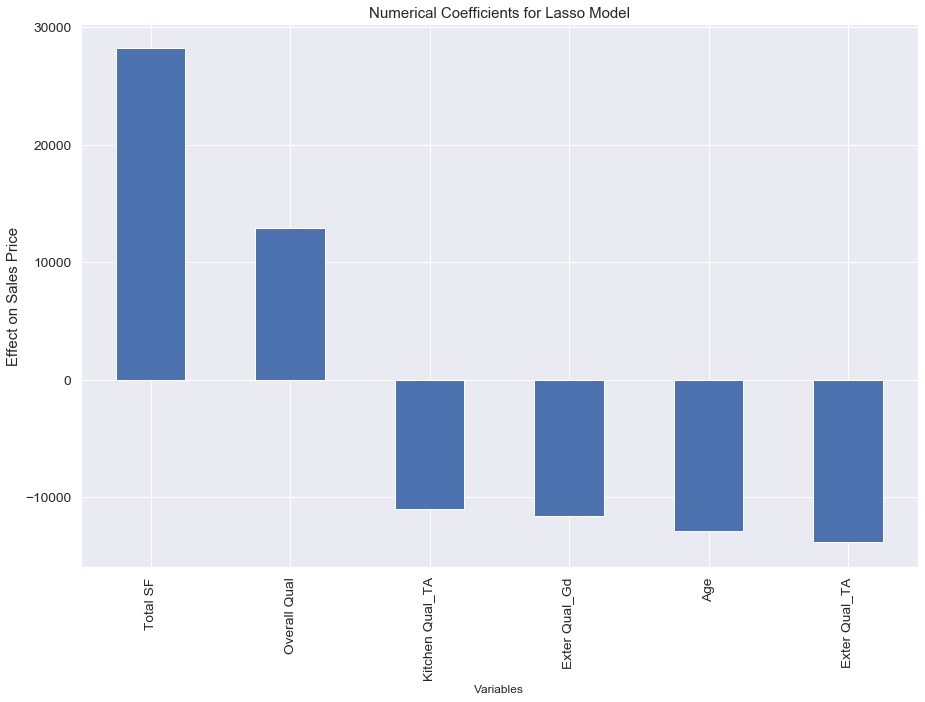

In [96]:
# Plot the graph
ax = numerical_df.plot.bar(title = 'Numerical Coefficients for Lasso Model', legend=False, figsize=(15,10))
ax.set_xlabel('Variables', fontsize=12)
ax.set_ylabel('Effect on Sales Price');

### Takeaways
- Coefficients are in-line with our understanding that square feet, quality positively effects the sale price, and older age decreases the sale price

---

## Submission
As our lasso model appears to score well in cross validation and against the `y_test` score, we will submit our predictions for the test data

In [97]:
# Create an empty dataframe
submission = pd.DataFrame()

# Assign a column 'Id' with values identical to the test dataframe
submission['Id'] = test.Id

In [98]:
# Get our test dataframe with our feature columns
# This is equivalent to 'X' in our training data
feats = test[features]

In [99]:
# Scale our 'X' data
feats_sc = ss.fit_transform(feats)

In [100]:
# Perform predictions of Sale Price based on our selected features
# with our lasso regression model
predictions = lasso.predict(feats_sc)

In [101]:
# Input our predictions into a new column for our submission
# matching the sale price to the respective Id
submission['SalePrice'] = predictions
submission.head()

,Id,SalePrice
0,2658,149603.104724
1,2718,152891.799410
2,2414,196935.405870
3,1989,107805.155576
4,625,172189.891921


In [102]:
# Ensure our dataframe has 879 rows in accordance to the
# kaggle competition rules
submission.shape

(879, 2)

In [103]:
# Save our dataframe into a csv file for submission
submission.to_csv('submission.csv', index=False)

---

## Conclusion
We noted that the overall quality, presence of facilities like garage, bathrooms and more space contributes to the increase of a sale price. Younger houses and remodelled houses tend to fetch a higher sale price as well.

For non-numerical data, the quality of these facilities such as garage and kitchen quality greatly affect the price and the type of neighborhood is also a major determining factor.

Our model based on lasso regression seems to be performing decent on both our train and test data with RMSE of 21K and 27K respectively. Further evaluation could be performed on the training dataset which may increase the RMSE for train but decrease for test which could result in a model with less variance for the test data and any house data our model needs to predict the price for in the future.